## A simple demo for using the clusters.py script

In [1]:
from clusters import clusters
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
# Input data from example geopackage
crs = 3875
fp = "./clusters_example_data/example_grid.gpkg"
grid = gpd.read_file(fp)
grid.head()

,population,owner_unique,osm_shops,amenity_count,number_of_stops_sum,avg_d_kbps_mean,5_mean,combined_index,geometry
0,708.0,2,6,4,14.0,86926.750000,600.0,0.812844,"MULTIPOLYGON (((2782124.922 8463689.312, 27827..."
1,3829.0,1,8,2,14.0,95109.285714,600.0,1.426001,"MULTIPOLYGON (((2783998.219 8461614.625, 27846..."
2,1780.0,1,17,15,16.0,69449.750000,NaN,NaN,"MULTIPOLYGON (((2779177.812 8464471.812, 27798..."
3,1492.0,1,4,2,8.0,NaN,NaN,NaN,"MULTIPOLYGON (((2780651.344 8464080.750, 27812..."
4,2199.0,18,46,25,78.0,100567.555556,NaN,NaN,"MULTIPOLYGON (((2787221.672 8465487.938, 27878..."


In [4]:
# Create clusters
cluster_gdf = clusters(
    gdf=grid,
    crs=crs,
    col="combined_index",
    alpha=0.2
)

/home/eemil/miniconda3/envs/gis/lib/python3.9/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])



Global spatial autocorrelation:
Moran's I:   0.555
p-value:     0.001

Distribution of clusters/outliers (quadrants):
LL    93
HH    38
HL    22
LH    17
Name: quadrant, dtype: int64

Significant clusters (using significance threshold 0.2):
True     90
False    80
Name: significant, dtype: int64


In [5]:
# Output
cluster_gdf.head()

,population,owner_unique,osm_shops,amenity_count,number_of_stops_sum,avg_d_kbps_mean,5_mean,combined_index,geometry,quadrant,significant
0,708.0,2,6,4,14.0,86926.750000,600.0,0.812844,"MULTIPOLYGON (((21720751.269 6692620.741, 2172...",LL,True
1,3829.0,1,8,2,14.0,95109.285714,600.0,1.426001,"MULTIPOLYGON (((21721743.586 6691649.089, 2172...",LL,True
2,1780.0,1,17,15,16.0,69449.750000,NaN,NaN,"MULTIPOLYGON (((21719265.224 6692920.084, 2171...",NaN,NaN
3,1492.0,1,4,2,8.0,NaN,NaN,NaN,"MULTIPOLYGON (((21720008.193 6692770.435, 2172...",NaN,NaN
4,2199.0,18,46,25,78.0,100567.555556,NaN,NaN,"MULTIPOLYGON (((21723226.181 6693666.020, 2172...",NaN,NaN


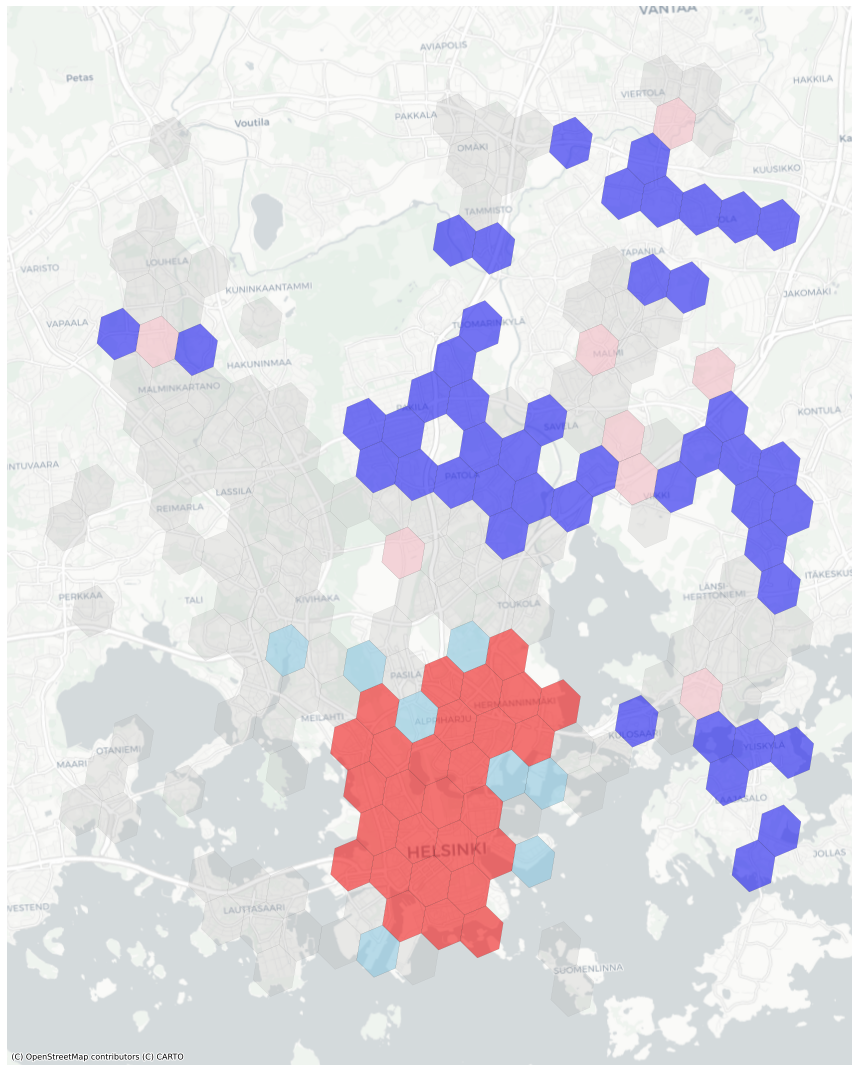

In [6]:
# Output visualized
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the complete grid in grey
cluster_gdf.plot(
    ax=ax,
    facecolor=[0.7, 0.7, 0.7],
    edgecolor="black",
    linewidth=0.1,
    alpha=0.25
)

# Plot significant grid cells in their respective colors
quadrant_colors = {"HH":"r", "LL":"b", "LH":"skyblue", "HL":"pink"}
for q, c in quadrant_colors.items():
    mask = cluster_gdf["significant"] & (cluster_gdf["quadrant"]==q)
    rows = cluster_gdf.loc[mask]
    rows.plot(ax=ax, color=c, edgecolor="k", linewidth=0.1, alpha=0.5)

ax.axis("off")

# Add basemap
ctx.add_basemap(
    ax=ax,
    crs=crs,
    source=ctx.providers.CartoDB.Positron
)

plt.tight_layout()
#plt.savefig("./docs/clusters_" + city + ".png", bbox_inches="tight")